# Telecom Churn - Case Study
##### By: Kirti Gupta & Debayan Talapatra

###### Business Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


##### Defining Churn
There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

###### Definitions of Churn
Definitions of Churn
There are various ways to define churn, such as:

###### Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

###### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


###### Business Objective 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### DataSet
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Dataset name:** telecom_churn_data.csv



###### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Data Reading and Understanding

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#Check Shape
churn.shape

(99999, 226)

In [4]:
#Check DataType
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Standard Calculations
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
print ("Total Features %d "% (churn.shape[1]))
print ("Unique customers: %d"%len(churn.mobile_number.unique()))

Total Features 226 
Unique customers: 99999


In [7]:
#columns name
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


##  Data Cleaning

##### Function to get missing/nan values

In [8]:
def get_nan_values(nanCutoff):
    # argument: nanCutoff:- % threshold for missing/nan values
    nan_values = round(100*(churn.isnull().sum()/churn.shape[0]))
    return nan_values.loc[nan_values > nanCutoff]

##### Function to impute missing/nan values

In [9]:
def impute_nan_values(data,imputedList=False,nan_list=False):
    # argument: imputedList, list for which nan is to be replaced with 0
    if imputedList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputedList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in nan_list:
            data[col].fillna(0, inplace=True)

##### Handling missing values/Entries
##### check  missing values

In [10]:
# missing/nan values more than 50%
get_nan_values(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out the these 40 features, some of them are required for Data analysis.We can impute these values for now for analysis.

In [11]:
# 'av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
# 'max_rech_data', 'total_rech_data','fb_user','night_pck_user 
#features are important for getting the high-value customers,
#impute  missing values with 0

impute_highValueCols = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
impute_nan_values(churn,impute_highValueCols)

In [12]:
get_nan_values(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [13]:
# dropping rest of the columns having more than 50% missing values
nan_columns = list(get_nan_values(50).index)
churn.drop(nan_columns,axis=1,inplace=True)


In [14]:
churn.shape

(99999, 222)

In [15]:
# missing/nan values more than 30%
get_nan_values(30) 

Series([], dtype: float64)

In [16]:
# missing/nan values more than 10%
get_nan_values(10) 

Series([], dtype: float64)

In [17]:
# missing/nan values more than 5%
get_nan_values(5) 

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

from above data :- all features for the month september(9th) have missing values.

In [18]:
# Column/Features which have more tah 5% missing value
nan_columns = list(get_nan_values(5).index)
print(nan_columns)
churn[churn[nan_columns].isnull().all(axis=1)][nan_columns].head()

['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### above features can be imputed with 0

In [19]:
impute_nan_values(churn,nan_list=nan_columns)

In [20]:
churn=churn[~churn[nan_columns].isnull().all(axis=1)]
churn.shape

(99999, 222)

In [21]:
# missing/nan values more than 2%
get_nan_values(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
                      ... 
loc_ic_t2f_mou_8       5.0
loc_ic_mou_6           4.0
loc_ic_mou_7           4.0
loc_ic_mou_8           5.0
std_ic_t2t_mou_6       4.0
std_ic_t2t_mou_7       4.0
s

In [22]:
# Column/Features which have more than 2% missing value
nan_columns = list(get_nan_values(2).index)
print (nan_columns)

churn[churn[nan_columns].isnull().all(axis=1)][nan_columns].head()

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### drop these customers

In [23]:
churn=churn[~churn[nan_columns].isnull().all(axis=1)]
churn.shape

(99618, 222)

In [24]:
# For other customers where we have missing values, impute them with 0. 

nan_columns.remove('date_of_last_rech_8')
nan_columns.remove('date_of_last_rech_9')
impute_nan_values(churn,nan_list=nan_columns)

In [25]:
# Column/Features which have more than 0% missing values
get_nan_values(0)

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [26]:
#Check above features
nan_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in nan_columns:
    print(churn[c].value_counts())
    churn[c].fillna(churn[c].mode()[0], inplace=True)


0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


##### above features have  one value. imputing their missing values with  mode


In [27]:
# Column/Features which have more than 0% missing value
get_nan_values(0)

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [28]:
#number of rows that has null values
nan_columns = list(get_nan_values(0).index)
len(churn[churn[nan_columns].isnull().all(axis=1)])

22

In [29]:
churn[churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn[churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn[churn['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn[churn['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

<br><br>columns with 0 (as values).

In [30]:
zero_columns=churn.columns[(churn == 0).all()]
zero_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [31]:
# drop columns which have single value '0'. 
churn.drop(zero_columns,axis=1,inplace=True)

In [32]:
# Percentage of data after Data cleaning.
print("after Data cleaning :% of data {}%".format(round(churn.shape[0]/99999 *100,2)))
churn.shape

after Data cleaning :% of data 99.62%


(99618, 211)

##### check  data types 

In [33]:
churn.reset_index(inplace=True,drop=True)
# date columns filter
date_columns = list(churn.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [34]:
# Converting dtype of date columns to datetime
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [35]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


##### monthly features which are not in the standard naming (\_6,\_7,\_8,\_9)

In [36]:
# renaming columns,
#'jun_vbc_3g' : 'jun_vbc_3g_6'
#'jul_vbc_3g' : 'july_vbc_3g_7'
#'aug_vbc_3g' : 'aug_vbc_3g_8'
#'sep_vbc_3g' : 'sep_vbc_3g_9'
churn.rename(columns={'jun_vbc_3g' : 'jun_vbc_3g_6', 'jul_vbc_3g' : 'july_vbc_3g_7', 'aug_vbc_3g' : 'aug_vbc_3g_8',
                      'sep_vbc_3g' : 'sep_vbc_3g_9'}, inplace=True)

**Derived Variables for** 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

These will store the total data volume (= vol_2g_mb_* + vol_3g_mb_*) monthwise.

In [37]:
#Derived Variables for: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

###### Filter high-value customers
upto 70th percentile of the average recharge amount in the first two months ( good phase).

In [38]:
recharge_col = churn.filter(regex=('count')).columns
churn[recharge_col].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Derived Variables for** avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
##### average recharge value month wise

In [39]:
# Derived Variables for: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)

In [40]:
impute_nan_values(churn,nan_list=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

**Derived Variables for** total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

##### total number of data recharge month wise.

In [41]:
#Derived Variables for total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

**Derived Variables for** total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
##### total amount of data recharge month wise.

In [42]:
#Derived Variables for total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

**Derived Variables for** total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

##### total recharge amount month wise.

In [43]:
#Derived Variables for total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]
churn.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [44]:
# calculate avegare of first two months (good phase) total monthly recharge amount
good_phase =(churn.total_month_rech_6 + churn.total_month_rech_7)/2
# calculate cutoff which is the 70th percentile of the good phase average recharge amounts
highvalue_cutoff= np.percentile(good_phase,70)
# users who has avg. recharge amount >= to the cutoff of 70th percentile.
highvalue_users = churn[good_phase >=  highvalue_cutoff]
highvalue_users.reset_index(inplace=True,drop=True)

print("No. of High-Value Customers: %d\n"% len(highvalue_users))
print("% of High-value users : {}%".format(round(len(highvalue_users)/churn.shape[0]*100),2))

No. of High-Value Customers: 29906

% of High-value users : 30%


###### Tagging Churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [45]:
#function to find out churn status

In [46]:
def churn_status(data,churn_phase=9):
    #argument: churn_phase,4th month number in which users churn (default= 9)
    churn_var= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    isChurn = ~data[[s + str(churn_phase) for s in churn_var ]].any(axis=1)
    isChurn = isChurn.map({True:1, False:0})
    return isChurn

In [47]:
highvalue_users['churn'] = churn_status(highvalue_users,9)
print(" {} users tagged as churners out of {} High-Value Customers.".format(len(highvalue_users[highvalue_users.churn == 1]),highvalue_users.shape[0]))
print("High-value Customer Churn Percentage : {}%".format(round(len(highvalue_users[highvalue_users.churn == 1])/highvalue_users.shape[0] *100,2)))


 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Customer Churn Percentage : 8.09%


Here we have **highly imbalanced** data set.

---
##  Data Analysis

---

##### function to plot histogram

In [48]:
# Function to plot the histogram with labels
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='yellow', edgecolor='red')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()
    

##### Function to calculate monthly avg calls and plot it

In [49]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

##### Function to plot churn by mou

In [50]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=highvalue_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

##### function to plot by churn 

In [51]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(highvalue_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return highvalue_users.groupby('churn')[colList].mean()

In [52]:
# Filtering the common monthly columns
common_cols = highvalue_users.filter(regex ='_6').columns
monthly_cols = [item.strip('_6') for item in common_cols]
monthly_cols

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'jun_vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [53]:
# getting the number of monthly columns and profile columns
print ("columns:", highvalue_users.shape[1] )
print ("monthly columns : ",len(monthly_cols))
print ("Total monthly columns phase wise (%d*4): %d"%(len(monthly_cols), len(monthly_cols) * 4))
print ("Columns other than monthly columns :", highvalue_users.shape[1] - (len(monthly_cols) * 4))

columns: 232
monthly columns :  57
Total monthly columns phase wise (57*4): 228
Columns other than monthly columns : 4


In [54]:
#  remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
attr_9List = highvalue_users.filter(regex=('_9')).columns
highvalue_users.drop(attr_9List,axis=1,inplace=True)

In [55]:
# list of monthly columns 6,7,8
monthly_cols = [x + s for s in ['_6','_7','_8'] for x in monthly_cols]
monthly_cols

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'jun_vbc_3g_6',
 'vol_data_mb_6',
 'avg_r

In [56]:
# columns which are not monthly columns
nonmonthly_cols = [col for col in highvalue_users.columns if col not in monthly_cols]
nonmonthly_cols

['mobile_number', 'circle_id', 'aon', 'aug_vbc_3g_8', 'july_vbc_3g_7', 'churn']

###### Feature: circle_id

In [57]:
# Getting  distinct circle_id's
highvalue_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

We can drop this feature since it has only one value

In [58]:
highvalue_users.drop('circle_id',axis=1,inplace=True)

###### Feature: aon

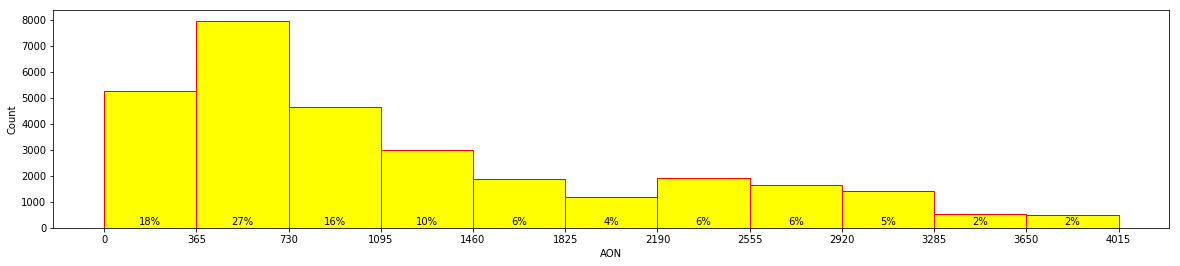

In [59]:
# Customers distribution by age 
plot_hist(highvalue_users,'aon',365)

- **Minimun Age** on network is 180 days.
- **Average age** on network for customers is 1200 days (3.2 years).
- 27% of the **High Value users are in their 2nd year** with the network.
- Almost 71% users have Age on network **less than 4 years.**
- 15% users are with the network from **over 7 years.**

In [60]:
#Create Derived categorical variable
highvalue_users['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

###### Incoming VS month VS AON

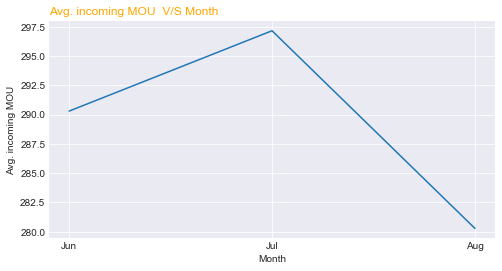

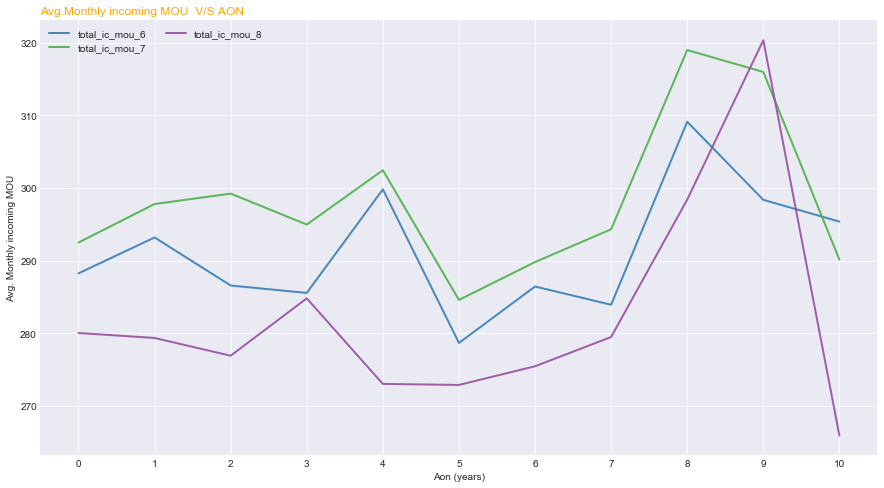

In [61]:
# Plotting Avg. total monthly incoming MOU vs AON
incoming_columns = highvalue_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',highvalue_users,calltype='incoming',colList=incoming_columns)
plot_avgMonthlyCalls('multi',highvalue_users,calltype='incoming',colList=incoming_columns)

Above plot shows that
- The more a customer stays on with the operator(AON), more the total monthly incoming MOU.
- Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
- Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
- Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg..

###### Outgoing VS month VS AON

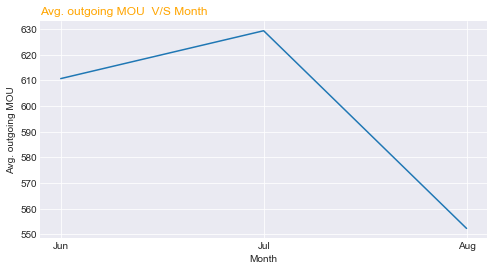

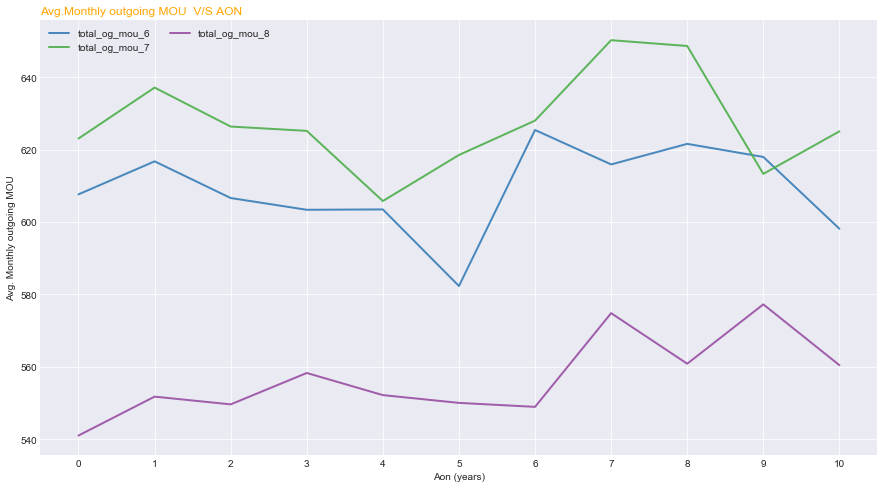

In [62]:
#  Avg. total monthly outgoing MOU vs AON
outgoing_columns = highvalue_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',highvalue_users,calltype='outgoing',colList=outgoing_columns)
plot_avgMonthlyCalls('multi',highvalue_users,calltype='outgoing',colList=outgoing_columns)

Above plot shows that
- Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the AON band between 7 - 8 years where it is almost simillar.
- Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).
- Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.
- The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8  years.

###### Incoming/Outgoing MOU VS Churn 

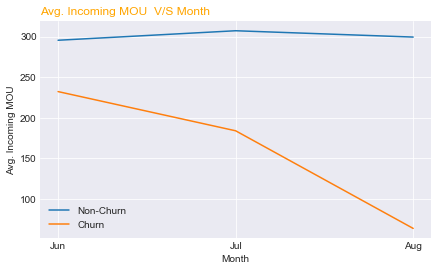

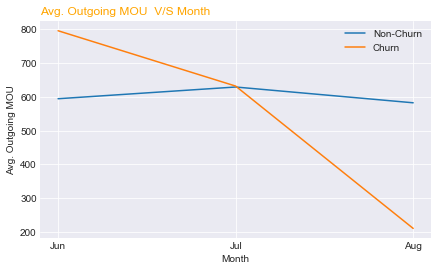

In [63]:
incoming_columns = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
outgoing_columns = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(incoming_columns,'Incoming')
plot_byChurnMou(outgoing_columns,'Outgoing')

It can be observed,
- Churners Avg. Incoming/Outgoing MOU's **drops drastically after the 2nd month,Jul.**
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

in terms of Statistics.

In [64]:
# Avg.Incoming MOU per month churn vs Non-Churn
highvalue_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [65]:
# Avg. Outgoing MOU per month churn vs Non-Churn
highvalue_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


**Derived Variables:** og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
---->(=total_og_mou_* / total_ic_mou_*)

In [66]:
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    highvalue_users['og_to_ic_mou_'+str(i)] = (highvalue_users['total_og_mou_'+str(i)])/(highvalue_users['total_ic_mou_'+str(i)]+1)

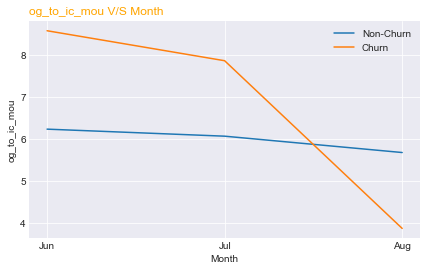

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [67]:
plot_byChurn(highvalue_users,'og_to_ic_mou')

- Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

##### Derived Variables:
loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8(=loc_og_mou_* / loc_ic_mou_*) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a **better predictor of churn

In [68]:
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    highvalue_users['loc_og_to_ic_mou_'+str(i)] = (highvalue_users['loc_og_mou_'+str(i)])/(highvalue_users['loc_ic_mou_'+str(i)]+1)

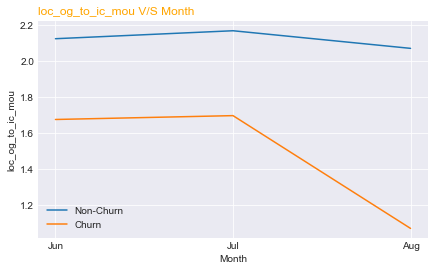

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [ ]:
plot_byChurn(highvalue_users,'loc_og_to_ic_mou')

It can be observed that,
- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

###### Total data volume VS Churn 

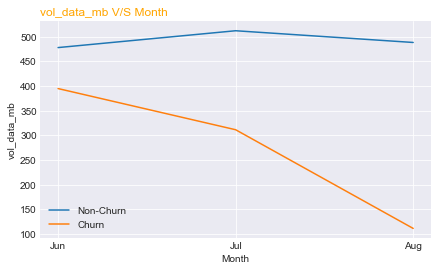

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [ ]:
plot_byChurn(highvalue_users,'vol_data_mb')

- The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### Total monthly rech VS Churn 

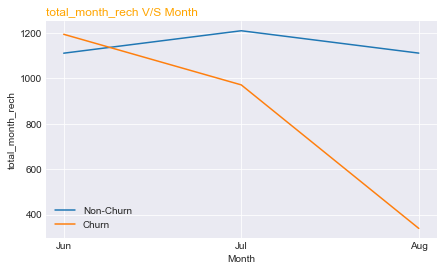

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [ ]:
plot_byChurn(highvalue_users,'total_month_rech')

- total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### max_rech_amt VS Churn 

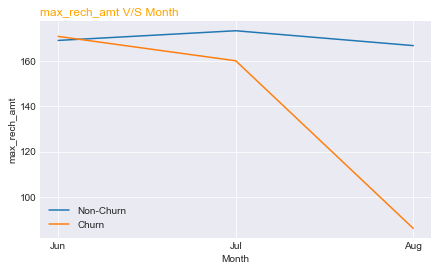

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [ ]:
plot_byChurn(highvalue_users,'max_rech_amt')

- maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### arpu VS Churn 

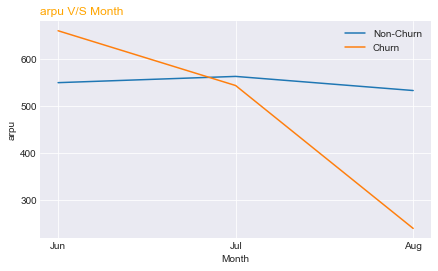

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [ ]:
plot_byChurn(highvalue_users,'arpu')

- Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Derived Variables:** Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8<br>
 **Total MOU** (=loc_og_mou+loc_ic_mou)Month wise

In [ ]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    highvalue_users['Total_loc_mou_'+str(i)] = (highvalue_users['loc_og_mou_'+str(i)])+(highvalue_users['loc_ic_mou_'+str(i)])

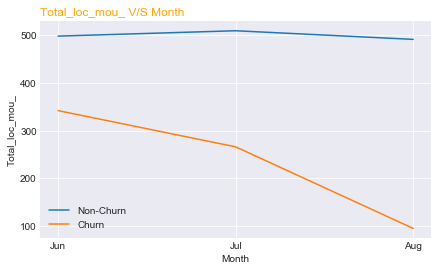

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [ ]:
plot_byChurn(highvalue_users,'Total_loc_mou_')

It can be observed that,
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

**Derived Variables:** Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8<br>
**Total roaming MOU** (=roam_ic_mou+roam_og_mou) month wise

In [ ]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    highvalue_users['Total_roam_mou_'+str(i)] = (highvalue_users['roam_ic_mou_'+str(i)])+(highvalue_users['roam_og_mou_'+str(i)])

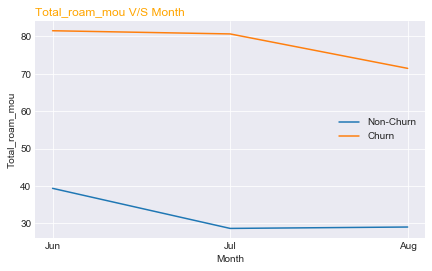

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [ ]:
plot_byChurn(highvalue_users,'Total_roam_mou')

It can be observed that,
- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

###### last_day_rch_amt VS Churn 

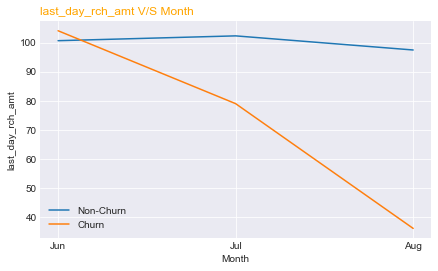

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [ ]:
plot_byChurn(highvalue_users,'last_day_rch_amt')

- The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
- Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

## Modeling

In [ ]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

##### Function to plot roc

In [ ]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

##### Function to get Model Metrics Results

In [ ]:
def getModelMetricsResults(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    

##### Function to predict churning with probability

In [ ]:
def predictChurnUsingProbCutOff(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetricsResults(y_df.churn,y_df.final_predicted)
    return y_df

In [ ]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [ ]:
def fit_model(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [ ]:
# creating copy of the final hv_user dataframe
highvalue_users_PCA = highvalue_users.copy()
# removing the columns not required for modeling
highvalue_users_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [ ]:
# removing the datatime columns before PCA
dateTimeCols = list(highvalue_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
highvalue_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [ ]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = highvalue_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = highvalue_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling imbalance.

Standard classifier algorithms like Decision Tree and Logistic have Regression have a bias towards classes which have number of instances,all tends to only predict the majority class data,there is a high probability of misclassification of the minority class as compared to the majority class.

##### Synthetic Minority Over-sampling Technique

A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. 

The new dataset is used as a sample to train the classification models.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
help(SMOTE)

Help on class SMOTE in module imblearn.over_sampling._smote:

class SMOTE(SVMSMOTE, BorderlineSMOTE)
 |  SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated', out_step='deprecated', kind='deprecated', svm_estimator='deprecated', n_jobs=1, ratio=None)
 |  
 |  Class to perform over-sampling using SMOTE.
 |  
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, (default='auto')
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 178)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

we'll let PCA select the number of components basen on a variance cutoff we provide

 **screeplot to assess the number of needed principal components**

In [ ]:
pca.explained_variance_ratio_[:50]

array([0.52913894, 0.1166657 , 0.0816683 , 0.04689798, 0.02584179,
       0.02237079, 0.01964869, 0.01659088, 0.01321824, 0.01176983,
       0.00898743, 0.00843637, 0.0076714 , 0.0061281 , 0.0054974 ,
       0.00498053, 0.0039488 , 0.00364592, 0.00345993, 0.00334175,
       0.00313343, 0.00308146, 0.00300552, 0.00267775, 0.00263377,
       0.00239202, 0.00232195, 0.00216938, 0.00211813, 0.00207988,
       0.00192842, 0.00182302, 0.00161634, 0.00134886, 0.00132756,
       0.00129843, 0.00119413, 0.00118133, 0.00103869, 0.00092527,
       0.00087023, 0.00080434, 0.00080033, 0.00074551, 0.00073027,
       0.00071356, 0.00065167, 0.00064958, 0.00062886, 0.00060785])

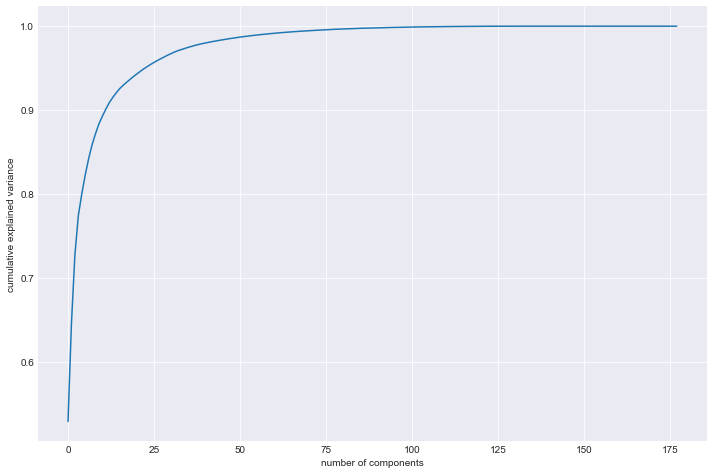

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### **50 components are enough to describe 95% of the variance in the dataset**
- We'll take 50 components for modeling

In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [ ]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009724118403006913 , min corr:  -0.013984397042994761


there is no correlation between any two components, We  have almost removed multicollinearity here , and models will be more stable now

In [ ]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

For prediction of churned customers we will be fitting variety of models,these are-
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
   

### 1. Logistic Regression

##### Applying Logistic Regression on  principal components

In [ ]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [ ]:
fit_model(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.827
Recall/Sensitivity : 0.8417
AUC Score (Train): 0.899923
CV Score : Mean - 0.8990912 | Std - 0.002043349 | Min - 0.896552 | Max - 0.902738


In [ ]:
# Test  data Results:
pred_probs_test = lr0.predict(X_test_pca)
getModelMetricsResults(y_test,pred_probs_test)

Roc_auc_score : 0.8176059484622296
Sensitivity/Recall : 0.8203342618384402
Specificity: 0.8148776350860188
False Positive Rate: 0.1851223649139811
Positive predictive value: 0.27822390174775624
Negative Predictive value: 0.9811816192560175
sklearn precision score value: 0.27822390174775624


In [ ]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.81531431119037
Recall : 0.8203342618384402
Precision : 0.27822390174775624


In [ ]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [ ]:
cut_off_prob=0.5
y_train_df = predictChurnUsingProbCutOff(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8269730685244878
Sensitivity/Recall : 0.8416865966517625
Specificity: 0.8122595403972133
False Positive Rate: 0.18774045960278674
Positive predictive value: 0.8176262626262626
Negative Predictive value: 0.8368866509535033
sklearn precision score value: 0.8176262626262626


,churn,churn_Prob,final_predicted
0,0,0.721737,1
1,0,0.008855,0
2,0,0.124703,0
3,0,0.022144,0
4,0,0.839912,1


**ROC Curve :**
An ROC curve states that:-
- It shows the tradeoff between sensitivity and specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space,the test becomes more accurate
- The closer the curve comes to the 45-degree diagonal of the ROC space,test becomes less accurate.

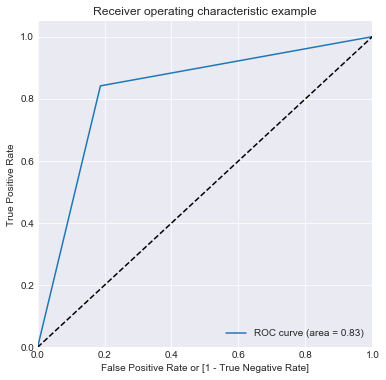

(array([0.        , 0.18774046, 1.        ]),
 array([0.       , 0.8416866, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
plot_roc(y_train_df.churn, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [ ]:
#plot_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


**Optimal Cutoff Point**<br>
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be consideredfor the same . We will try adjusting the probability cut offs which will result into higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672585  0.980087  0.365083
0.2   0.2  0.742383  0.954404  0.530363
0.3   0.3  0.784782  0.920921  0.648643
0.4   0.4  0.813221  0.886191  0.740252
0.5   0.5  0.826973  0.841687  0.812260
0.6   0.6  0.828429  0.782625  0.874233
0.7   0.7  0.814313  0.712956  0.915670
0.8   0.8  0.773526  0.596444  0.950608
0.9   0.9  0.596704  0.208329  0.985079


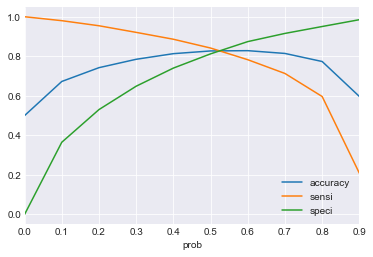

In [ ]:
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### **From the curve above, 0.45 is the optimum point .**
cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant ,here we can take 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [ ]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnUsingProbCutOff(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8211500467921389
Sensitivity/Recall : 0.8647707185192888
Specificity: 0.7775293750649891
False Positive Rate: 0.2224706249350109
Positive predictive value: 0.7953806426931905
Negative Predictive value: 0.8518455228981545
sklearn precision score value: 0.7953806426931905


,churn,churn_Prob,final_predicted
0,0,0.721737,1
1,0,0.008855,0
2,0,0.124703,0
3,0,0.022144,0
4,0,0.839912,1
5,1,0.899186,1
6,0,0.571067,1
7,0,0.229032,0
8,0,0.661786,1
9,0,0.223178,0


**Making prediction on test**

In [ ]:
# predicting with the choosen cut-off on test
predictChurnUsingProbCutOff(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8121194552080092
Sensitivity/Recall : 0.8440111420612814
Specificity: 0.7802277683547371
False Positive Rate: 0.2197722316452629
Positive predictive value: 0.25041322314049586
Negative Predictive value: 0.9829059829059829
sklearn precision score value: 0.25041322314049586


,churn,churn_Prob,final_predicted
4265,0,0.441555,0
29221,0,0.580813,1
974,0,0.392146,0
1602,0,0.307705,0
10225,0,0.158548,0
28358,0,0.114548,0
15763,0,0.052336,0
29075,0,0.369381,0
14665,0,0.325400,0
4719,0,0.093875,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) on the train and test set.
- **train sensitivity  :** 86.47%, **train roc auc score  :** 82.1%
- **test sensitivity   :** 84.40%, **test roc auc score  :** 81.21%

### 2. Decision Tree

##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [ ]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
fit_model(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7737
Recall/Sensitivity : 0.7352
AUC Score (Train): 0.852021
CV Score : Mean - 0.8401263 | Std - 0.005625113 | Min - 0.8340481 | Max - 0.848167


In [ ]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetricsResults(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.728165562337295
Sensitivity/Recall : 0.6476323119777159
Specificity: 0.8086988126968743
False Positive Rate: 0.19130118730312576
Positive predictive value: 0.22749510763209393
Negative Predictive value: 0.9634815242494227
sklearn precision score value: 0.22749510763209393


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         '

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('recall of',grid_search.best_score_,'using',grid_search.best_params_)

recall of 0.8094090097476426 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [ ]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [ ]:
fit_model(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8314
Recall/Sensitivity : 0.8248
AUC Score (Train): 0.916653
CV Score : Mean - 0.8923275 | Std - 0.002961782 | Min - 0.8867514 | Max - 0.8947951


In [ ]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetricsResults(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7529363664650144
Sensitivity/Recall : 0.6754874651810585
Specificity: 0.8303852677489701
False Positive Rate: 0.1696147322510298
Positive predictive value: 0.2572944297082228
Negative Predictive value: 0.9671229010864965
sklearn precision score value: 0.2572944297082228


In [ ]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8254
           1       0.26      0.68      0.37       718

    accuracy                           0.82      8972
   macro avg       0.61      0.75      0.63      8972
weighted avg       0.91      0.82      0.85      8972



##### Recall rate by deciding an optimal cut-off for the model to predict churn.

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnUsingProbCutOff(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8313663304564833
Sensitivity/Recall : 0.8248414266403244
Specificity: 0.8378912342726422
False Positive Rate: 0.1621087657273578
Positive predictive value: 0.8357477743243955
Negative Predictive value: 0.8270977675134719
sklearn precision score value: 0.8357477743243955


,churn,churn_Prob,final_predicted
0,0,0.029630,0
1,0,0.000000,0
2,0,0.136054,0
3,0,0.060000,0
4,0,0.753769,1


     prob  accuracy     sensi     speci
0.0   0.0  0.608116  1.000000  0.216232
0.1   0.1  0.732375  0.988302  0.476448
0.2   0.2  0.776542  0.967194  0.585890
0.3   0.3  0.807944  0.935427  0.680462
0.4   0.4  0.824088  0.897889  0.750286
0.5   0.5  0.831366  0.824841  0.837891
0.6   0.6  0.827337  0.784652  0.870022
0.7   0.7  0.813507  0.720755  0.906260
0.8   0.8  0.764454  0.575803  0.953104
0.9   0.9  0.694837  0.406000  0.983675


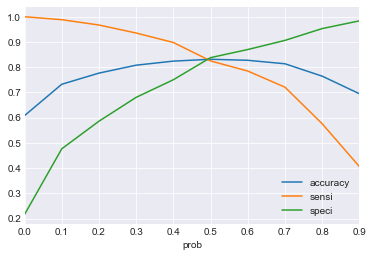

In [ ]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, let'choose 0.4 as the optimum point to make a high enough sensitivity.**

In [ ]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnUsingProbCutOff(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.824087553291047
Sensitivity/Recall : 0.8978891546220235
Specificity: 0.7502859519600708
False Positive Rate: 0.2497140480399293
Positive predictive value: 0.7824038417976714
Negative Predictive value: 0.8802073802988716
sklearn precision score value: 0.7824038417976714


,churn,churn_Prob,final_predicted
0,0,0.029630,0
1,0,0.000000,0
2,0,0.136054,0
3,0,0.060000,0
4,0,0.753769,1


- At 0.58 cut-off prob. there is a balance of sensitivity , specificity and accuracy.
<br>Lets see how it performs on test data.

In [ ]:
#Test data Results
y_test_df= predictChurnUsingProbCutOff(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.765698812021925
Sensitivity/Recall : 0.7813370473537604
Specificity: 0.7500605766900896
False Positive Rate: 0.24993942330991034
Positive predictive value: 0.21379573170731708
Negative Predictive value: 0.9752678008821676
sklearn precision score value: 0.21379573170731708


,churn,churn_Prob,final_predicted
4265,0,0.278846,0
29221,0,0.650000,1
974,0,0.621622,1
1602,0,0.194286,0
10225,0,0.000000,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 89.78%**  and  **Train Roc_auc_score : 82.40**
<br>**Test Recall : 78.13%**  and  **Test Roc_auc_score : 76.56**

Random Forest still seems overfitted to the data. 

### 3. Random Forest

##### Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [ ]:
def plot_Accuracy(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth

In [ ]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

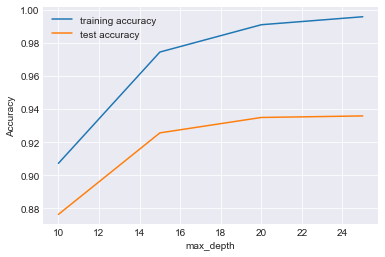

In [ ]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

#### Tuning n_estimators

In [ ]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",return_train_score=True)

In [ ]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_

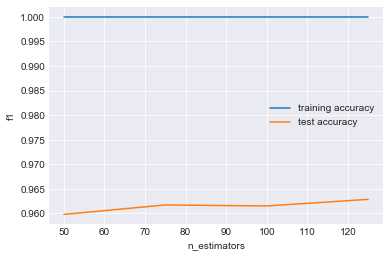

In [ ]:
plot_Accuracy(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

#### Tuning max_features

In [ ]:
parameters = {'max_features': [4, 8, 14]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [ ]:
rfgs.fit(X_train_pca,y_train_res) 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=80, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'max_features': [4, 

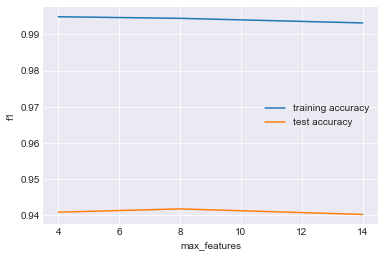

In [ ]:
plot_Accuracy(rfgs.cv_results_,'max_features')

Selecting max_features = 3

#### Tuning min_sample_leaf

In [ ]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [ ]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=80, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples

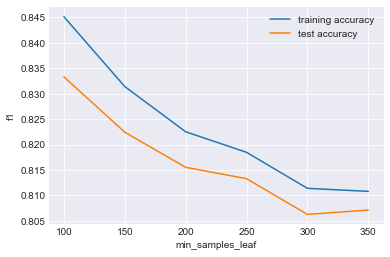

In [ ]:
plot_Accuracy(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

#### Tuning min_sample_split

In [ ]:
parameters = {'min_samples_split': range(150, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

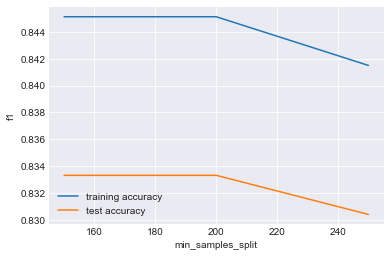

In [ ]:
rfgs.fit(X_train_pca,y_train_res)
plot_Accuracy(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 150

#### Tunned Random Forest

In [ ]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=3,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [ ]:
print("Train data Results:")
fit_model(rf_final,X_train_pca,y_train_res)

Train data Results:

Model Report
Accuracy : 0.8528
Recall/Sensitivity : 0.8453
AUC Score (Train): 0.931881
CV Score : Mean - 0.9152737 | Std - 0.003827433 | Min - 0.9080381 | Max - 0.9187366


In [ ]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [ ]:
print("Test data Results:")
getModelMetricsResults(y_test,predictions)

Test data Results:
Roc_auc_score : 0.791634747194405
Sensitivity/Recall : 0.7311977715877437
Specificity: 0.8520717228010661
False Positive Rate: 0.14792827719893384
Positive predictive value: 0.3006872852233677
Negative Predictive value: 0.9732908939939109
sklearn precision score value: 0.3006872852233677


After hyperparameter tuning for the random forest. The Recall rate(Test) is 73.11%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnUsingProbCutOff(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.852760736196319
Sensitivity/Recall : 0.8453259852344807
Specificity: 0.8601954871581574
False Positive Rate: 0.13980451284184256
Positive predictive value: 0.8580852860460206
Negative Predictive value: 0.8475922131147541
sklearn precision score value: 0.8580852860460206


,churn,churn_Prob,final_predicted
0,0,0.469126,0
1,0,0.081113,0
2,0,0.273657,0
3,0,0.269646,0
4,0,0.821398,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.547442  1.000000  0.094884
0.2   0.2  0.686545  0.995997  0.377093
0.3   0.3  0.791775  0.967401  0.616148
0.4   0.4  0.842830  0.916034  0.769627
0.5   0.5  0.852761  0.845326  0.860195
0.6   0.6  0.840205  0.756785  0.923625
0.7   0.7  0.785796  0.609026  0.962566
0.8   0.8  0.686207  0.385047  0.987366
0.9   0.9  0.556385  0.114329  0.998440


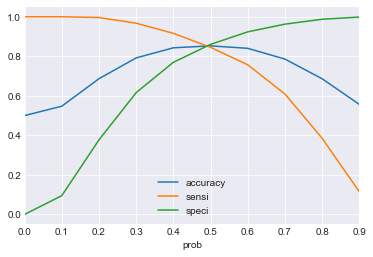

In [ ]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the plot above, 0.45 is the optimal point with high enough sensitivity.**

In [ ]:
cut_off_prob=0.45
predictChurnUsingProbCutOff(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.851720910886971
Sensitivity/Recall : 0.8840074867422273
Specificity: 0.8194343350317147
False Positive Rate: 0.18056566496828533
Positive predictive value: 0.8303867942957609
Negative Predictive value: 0.8760004446420632
sklearn precision score value: 0.8303867942957609


,churn,churn_Prob,final_predicted
0,0,0.469126,1
1,0,0.081113,0
2,0,0.273657,0
3,0,0.269646,0
4,0,0.821398,1
5,1,0.855663,1
6,0,0.387960,0
7,0,0.304119,0
8,0,0.632385,1
9,0,0.317060,0


**Making prediction on test**

In [ ]:
y_test_df= predictChurnUsingProbCutOff(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7933833718166865
Sensitivity/Recall : 0.775766016713092
Specificity: 0.811000726920281
False Positive Rate: 0.18899927307971892
Positive predictive value: 0.26310817194142655
Negative Predictive value: 0.9765134938001458
sklearn precision score value: 0.26310817194142655


,churn,churn_Prob,final_predicted
4265,0,0.453152,1
29221,0,0.391242,0
974,0,0.605375,1
1602,0,0.385198,0
10225,0,0.194941,0


- Random Forest after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 88.40%**  and  **Train Roc_auc_score : 85.17**
<br>**Test Recall : 77.57%**  and  **Test Roc_auc_score : 79.33**

---------------

## Model Selection
The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

| Model                                 | Train  Results   | Test Results  |
|---------------------------------------|------------------|---------------|
| Logistic Regression ( cut-off = 0.45) |  ------------------------------  |
| Roc_auc_score                         | 82.11%           | 81.21%        |
| Sensitivity/Recall                    | 86.48%           | 84.40%        |
| Specificity                           | 77.75%           | 78.02%        |
| precision                             | 79.54%           | 25.04%        |
| DecisionTree ( cut-off = 0.4)         |  ------------------------------  |
| Roc_auc_score                         | 82.41%           | 76.57%        |
| Sensitivity/Recall                    | 89.79%           | 78.13%        |
| Specificity                           | 75.03%           | 75%           |
| precision                             | 78.24%           | 21.38%        |
| Random Forest (cut-off = 0.45)        |   -----------------------------  |
| Roc_auc_score                         | 85.60%           | 96.53%        |
| Sensitivity/Recall                    | 88.70%           | 77.57%        |
| Specificity                           | 82.50%           | 81.73%        |
| precision                             | 83.52%           | 26.97%        |



Overall, the **Logistic Regression** model with probability cut-off = 0.45, performs best. It achieved the **best recall accuracy of 84.4%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 78.13% recall accuracy on test data. 
The Random Forest avoided overfitting but obtained only 77.57% recall accuracy on test data. 



## Identifying relevant churn features. 

We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

### Random Forest for churn driver features 

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.2min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [ ]:
rf.fit(X_train_res, y_train_res)

In [ ]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

Some of the top main predictiors of churn are the monthly features for the action phase (3rd month August).

above plot shows that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers,features :-




1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**total_roam_mou_8**	-- *Total incoming+outgoing roaming minutes of usage in month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
7.	**Total_loc_mou_8**		-- *Total local minutes of usage in month 8*
8.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
9.	**total_rech_amt_8**	-- *total recharge amount in month 8*
10.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
11.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
12.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
13.	**arpu_8**				-- *average revenue per user in month 8*
14.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
15.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
16.	**av_rech_amt_data_8**	-- *average recharge amount for mobile data in month 8*
17.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
18.	**total_og_t2t_mou_8**	-- *total outgoing calls from same operator minutes of usage in month 8*
19.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
20.	**total_rech_amt_data_8**	-- *total recharge amount for data in month 8*
21.	**max_rech_data_8**		-- *maximum data recharge (MB) in month 8*
22.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
23.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
24.	**vol_data_mb_8**		-- *volume of data (MB) consumed for month 8*
25.	**count_rech_2g_8**		-- *Number of 2g data recharge in month 8*
26.	**loc_og_to_ic_mou_8**	-- *local outgoing to incoming mou ratio for month of 8*
27.	**spl_og_mou_7**		-- *Special outgoing call for the month of 7*

Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. 

## Approach to reduce customer churn

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.

#### Monitoring Drop in usage

Customer churn can be predicted by Usage based Churn, and it gives good accuracy.
telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month.



######  Outgoing services

In [ ]:
# Outgoing Mou
plot_byChurnMou(outgoing_columns,'Outgoing')

-  Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage

###### Roaming services

In [ ]:
plot_byChurn(highvalue_users,'Total_roam_mou')

Strategy Approach:-
- Churners show higher roaming usage than non-churners.
- The Network operators must further investigate their roaming tariffs, and quality of service.
- Roaming tariffs offered are less competitive than their competitor.
- Discounted roaming rates during particular hours of the day.
- Free monthly roaming mou's depending on the users past roaming mou usage.